## Meta Analysis examples

In this notebook we consider two recently published meta-analyses of the psychological correlates of cannabis use:

__Hindley et al.:__ [Psychiatric symptoms caused by cannabis constituents: a systematic review and meta-analysis](https://www.thelancet.com/journals/lanpsy/article/PIIS2215-0366(20)30074-2/fulltext#seccestitle10)

__Schoeler et al.:__ [Assessing rates and predictors of cannabis-associated psychotic symptoms across observational, experimental and medical research](https://www.nature.com/articles/s44220-024-00261-x#code-availability)

__Overview of Hindley et al.__

This is a focused meta-analysis of experiments that employ a [crossover design](https://en.wikipedia.org/wiki/Crossover_study) to assess the psychological effect of [tetrahydrocannabinol (THC)](https://en.wikipedia.org/wiki/Tetrahydrocannabinol), which is the primary psychoactive constituent of cannabis. In each study, healthy subjects were recruited according to eligibility criteria.  Then, in consecutive sessions subjects were administered controlled doses of THC or a placebo in a blinded fashion.  All subjects received both treatments (THC and placebo), and in some (but not all) studies the order of treatment administration was randomized.  Established symptom scales were used to quantify each subject's psychological state following each treatment.  

All analysis is _within subjects_, meaning that we focus on the difference in a symptom scale between the THC and placebo treatments within each subject.

The symptom scales in this work are referred to as _positive_ and _negative_.  These terms have technical meanings in psychiatry, with _positive_ referring to delusions and hallucinations while _negative_ refers to amotivation and blunted affect.  We will focus on the positive symptom scales here.

This meta-analysis imposed strict criteria for a study to be included.  Out of 517 studies that were initially considered, only 15 met the meta-analysis inclusion criterion.

__Overview of Schoeler et al.__

This is a synthesis of findings from experimental and observational studies of mental health sequelae of cannabis use, or of THC administration in experimental and/or medical settings.  All studies focus on psychological symptoms and associated outcomes relating to psychosis that may be caused by cannabis.  THis scope includes individual symptoms as well as the outcome of seeking emergency care due to psychosis symptoms.

There are essentially three distinct analyses:

* The cannabis use findings aim to capture psychological symptoms in cannabis users based on observational data.  The underlying studies mainly rely on self reported assessments of self-identified cannabis users among people who are enrolled into observational studies or who participate in web-surveys.  

* The studies conducted in medical settings assess psychosis-related side effects of THC treatment for medical conditions such as pain.

* The studies of THC administration in healthy subjects mostly echo the findings of the Hindley et al. study.


In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.distributions import t
import statsmodels.api as sm

In [ ]:
# Delete this later
def prep(s):
  s = s.split("\n")
  rows = [x.split() for x in s]
  header = rows.pop(0)
  da = []
  for j in range(len(header)):
    da.append([r[j] for r in rows])
  da = pd.DataFrame(da).T
  da.columns = header
  return da

We can extract the data for the positive symptom scale from [supplementary table 2](
https://www.thelancet.com/cms/10.1016/S2215-0366(20)30074-2/attachment/acd95ee4-1612-449d-adec-45fede8a9b51/mmc1.pdf).  Some of the key variables in the dataset are:

* _n1i_, _n2i_ the treatment and placebo sample sizes, which are always equal since this is a within-subjects design

* _m1i_, _m2i_ the sample means of the symptom scales for the treatment and control responses, respectively

* _sd1i_, _sd2i_ the sample [standard deviations](https://en.wikipedia.org/wiki/Standard_deviation) of the symptom scales for the treatment and control conditions, respectively


In [ ]:
dt = """author,year,time,n1i,m1i,sd1i,n2i,m2i,sd2i,route,thc_drob,dose,prev_cannabis_mean,frequent_use,current_use,tobacco_current,age_m,Male,panss_bprs
Barkus,2011,30,9,13.37,2.4,9,7.12,0.0,1,0,2.5,153.0,1.0,0.0,,26.3,100%,1
Bhattacharyya,2015,120,36,9.6,3.62367,36,7.26,0.582702,0,1,10.0,10.8333,0.0,0.0,25%,25.97,100%,1
Bhattacharyya,2009,120,15,9.58847489,8.27122099,15,7.05801,0.24986901,0,1,10.0,8.0,0.0,0.0,46.66666667%,26.7,100%,1
D'Souza,2012,10,26,12.65,3.19,26,7.96,2.18,1,1,2.133,318.0,1.0,,15.79%,25.92,65.3846154%,1
D'Souza,2004,10,18,9.966837,2.71207595,18,6.813776,0.82992611,1,1,5.0,60.77,0.0,0.0,23.81%,29.0,63.6363636%,1
D'Souza,2008,10,20,10.52,2.61,20,8.05,1.5,1,1,5.0,147.51,1.0,1.0,,24.8,70%,1
D'Souza,2009a,15,14,9.48755251,1.51,14,7.6335764,0.73450605,1,1,2.0774,48.86,0.0,0.0,0%,25.85,78.5714286%,1
D'Souza,2009b,15,9,8.54065211,1.27455069,9,7.991526,0.866052,1,1,2.1125,141.72,1.0,1.0,11.11111111%,22.66,100%,1
Kleinloog,2012,36,32,9.07,2.29,32,7.47,0.9,2,1,,292.2,1.0,0.0,0%,22.3,100%,1
Liem-Moolenaar,2010,40,11,10.63,3.96,11,7.72,1.27,2,1,,,,0.0,,24.1,100%,1
Morgan,2018,NR,48,6.6870748,1.03687393,48,6.42857,1.0,2,1,8.0,,,1.0,70.83333333%,21.705,70.83%,0
Morrison,2009,30,21,10.41396,5.28399034,21,7.0005403,0.0,1,0,2.5,,,0.0,,28.0,100%,1
Morrison,2011,30,16,11.3133161,3.5703548,16,7.036427,0.0,1,0,1.25,40.0,0.0,0.0,,26.0,43.75%,1
Radhakrishnan,2015,70,23,10.87,2.44,23,8.04,1.46,1,1,1.2147,296.75,1.0,,14.8148148%,26.26,100%,1
Ranganathan,2012,120,26,9.68,1.93,26,7.726444,1.03775281,1,1,1.89,,,,26.66666667%,27.14,86.6666667%,1"""

da = pd.read_csv(io.StringIO(dt))
da

,author,year,time,n1i,m1i,sd1i,n2i,m2i,sd2i,route,thc_drob,dose,prev_cannabis_mean,frequent_use,current_use,tobacco_current,age_m,Male,panss_bprs
0,Barkus,2011,30,9,13.370000,2.400000,9,7.120000,0.000000,1,0,2.5000,153.0000,1.0,0.0,NaN,26.300,100%,1
1,Bhattacharyya,2015,120,36,9.600000,3.623670,36,7.260000,0.582702,0,1,10.0000,10.8333,0.0,0.0,25%,25.970,100%,1
2,Bhattacharyya,2009,120,15,9.588475,8.271221,15,7.058010,0.249869,0,1,10.0000,8.0000,0.0,0.0,46.66666667%,26.700,100%,1
3,D'Souza,2012,10,26,12.650000,3.190000,26,7.960000,2.180000,1,1,2.1330,318.0000,1.0,NaN,15.79%,25.920,65.3846154%,1
4,D'Souza,2004,10,18,9.966837,2.712076,18,6.813776,0.829926,1,1,5.0000,60.7700,0.0,0.0,23.81%,29.000,63.6363636%,1
5,D'Souza,2008,10,20,10.520000,2.610000,20,8.050000,1.500000,1,1,5.0000,147.5100,1.0,1.0,NaN,24.800,70%,1
6,D'Souza,2009a,15,14,9.487553,1.510000,14,7.633576,0.734506,1,1,2.0774,48.8600,0.0,0.0,0%,25.850,78.5714286%,1
7,D'Souza,2009b,15,9,8.540652,1.274551,9,7.991526,0.866052,1,1,2.1125,141.7200,1.0,1.0,11.11111111%,22.660,100%,1
8,Kleinloog,2012,36,32,9.070000,2.290000,32,7.470000,0.900000,2,1,NaN,292.2000,1.0,0.0,0%,22.300,100%,1
9,Liem-Moolenaar,2010,40,11,10.630000,3.960000,11,7.720000,1.270000,2,1,NaN,NaN,NaN,0.0,NaN,24.100,100%,1


Before proceeding to a more formal meta-analysis, we first use visualization to explore the data.

The first two plots below show the relationship between the standard deviation and mean, first in the treatment condition and then in the placebo condition. A few immediate insights are:

* There is a weak but evident mean/variance relationship, in which the studies with greater means tend to have greater standard deviation.

* Three of the studies report zero standard deviation in the placebo condition.

Text(0, 0.5, 'Treatment standard deviation')

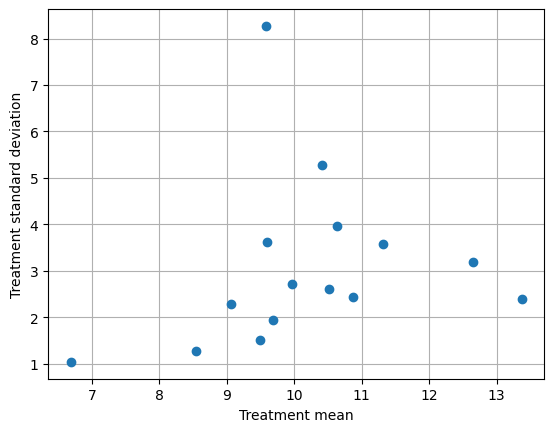

In [ ]:
plt.grid(True)
plt.plot(da["m1i"], da["sd1i"], "o")
plt.xlabel("Treatment mean")
plt.ylabel("Treatment standard deviation")

Text(0, 0.5, 'Placebo standard deviation')

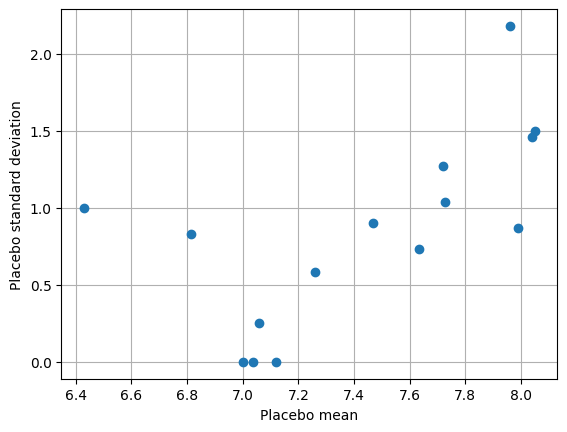

In [ ]:
plt.grid(True)
plt.plot(da["m2i"], da["sd2i"], "o")
plt.xlabel("Placebo mean")
plt.ylabel("Placebo standard deviation")

The scatterplot below examines the relationship between the treatment and placebo mean responses.  If there is a lot of heterogeneity in baseline risk, this plot will show a positive trend.  Although no such trend is evident here, it is notable that the same study has the lowest mean for both the placebo and treatment conditions.

Text(0, 0.5, 'Placebo mean')

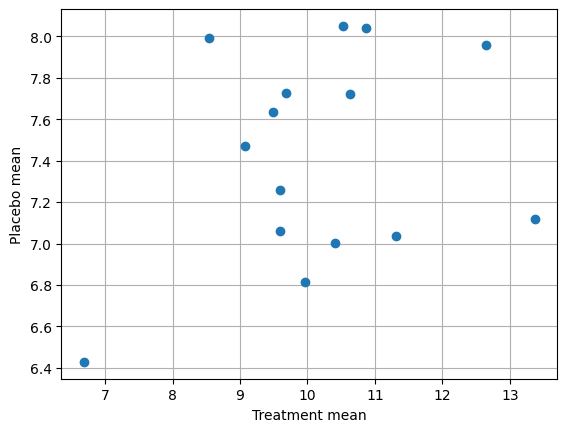

In [ ]:
plt.grid(True)
plt.plot(da["m1i"], da["m2i"], "o")
plt.xlabel("Treatment mean")
plt.ylabel("Placebo mean")

Text(0, 0.5, 'Placebo standard deviation')

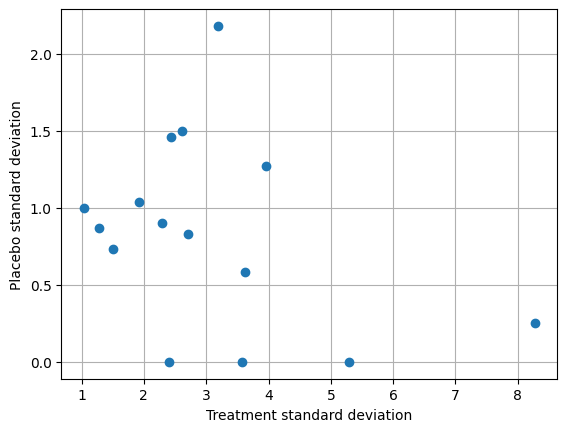

In [ ]:
plt.grid(True)
plt.plot(da["sd1i"], da["sd2i"], "o")
plt.xlabel("Treatment standard deviation")
plt.ylabel("Placebo standard deviation")

The next two scatterplots show the treamtent and placebo sample sizes against their respective means.

An observation that can be made here is that there is a weak tendency for large studies (in terms of sample size) to have greater responses under the treamtent condition, althought the largest study of all has the smallest response.  Under the placebo condition, there is no evident relationship between sample size and mean response, and again the largest study has the smallest response.

Text(0, 0.5, 'Treatment mean')

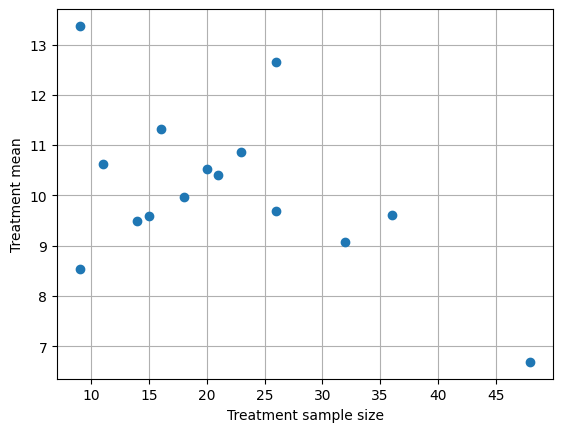

In [ ]:
plt.grid(True)
plt.plot(da["n1i"], da["m1i"], "o")
plt.xlabel("Treatment sample size")
plt.ylabel("Treatment mean")

Text(0, 0.5, 'Placebo mean')

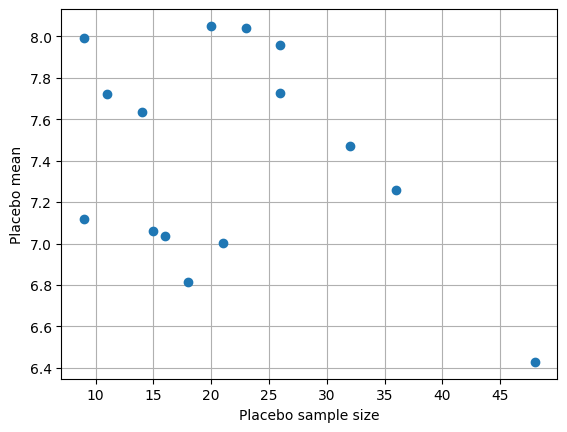

In [ ]:
plt.grid(True)
plt.plot(da["n2i"], da["m2i"], "o")
plt.xlabel("Placebo sample size")
plt.ylabel("Placebo mean")

The scatterplot below shows the placebo mean plotted against the treatment mean.  The grey line is the line of equality and it is evident that in all studies, the treatment mean is greater than the placebo mean.

Text(0, 0.5, 'Placebo mean')

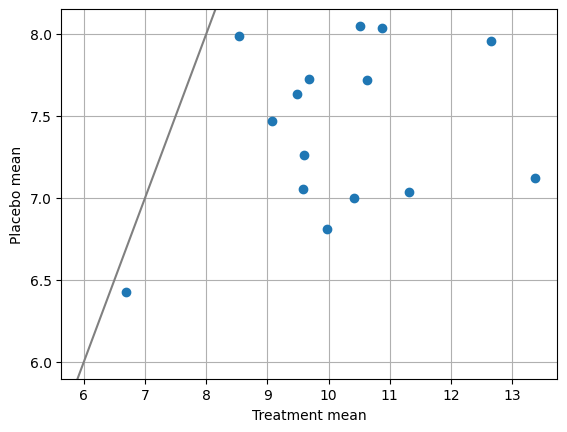

In [ ]:
plt.grid(True)
plt.plot(da["m1i"], da["m2i"], "o")
plt.axline([6, 6], [8, 8], color="grey")
plt.xlabel("Treatment mean")
plt.ylabel("Placebo mean")

The function below calculates the average within-subject "standardized mean change" (SMC) between the treatment and control conditions and its standard error, for each study in the meta-analysis.

A key challenge here is that in any within-subjects design, the two measurements for a subject are correlated, but researchers rarely report this correlation in their manuscripts.  However the standardized mean change cannot be calculated without this information.  It is therefore common in meta-analyses to assume a value for this correlation such as r=0.5.

In [ ]:
def gen_se(da, r):
  """
  Append the standardized mean change (SMC) for each study to the dataframe 'da',
  assuming that the within-subject correlation is 'r'.

  The standard error for the SMC is also calculated, along with the upper and lower 95% confidence bounds.
  """
  # Standard deviation of the within-subject difference for one subject.
  sdd = np.sqrt(da["sd1i"]**2 + da["sd2i"]**2 - 2*r*da["sd1i"]*da["sd2i"])
  # The standardized mean difference
  da["smc"] = (da["m1i"] - da["m2i"]) / sdd
  # The standard errors of the condition-specific responses
  da["se1i"] = da["sd1i"] / np.sqrt(da["n1i"])
  da["se2i"] = da["sd2i"] / np.sqrt(da["n2i"])
  # The standard error of the standardized mean difference
  va = da["se1i"]**2 + da["se2i"]**2 - 2*r*da["se1i"]*da["se2i"]
  da["smc_se"] = np.sqrt(va) / sdd
  # Lower and upper confidence limits for the SMC
  qq = t(da["n1i"]).ppf(0.975)
  da["lcb"] = da["smc"] - qq*da["smc_se"]
  da["ucb"] = da["smc"] + qq*da["smc_se"]
  return da

da = gen_se(da, 0.5)
da

,author,year,time,n1i,m1i,sd1i,n2i,m2i,sd2i,route,...,tobacco_current,age_m,Male,panss_bprs,smc,se1i,se2i,smc_se,lcb,ucb
0,Barkus,2011,30,9,13.370000,2.400000,9,7.120000,0.000000,1,...,NaN,26.300,100%,1,2.604167,0.800000,0.000000,0.333333,1.850114,3.358219
1,Bhattacharyya,2015,120,36,9.600000,3.623670,36,7.260000,0.582702,0,...,25%,25.970,100%,1,0.694298,0.603945,0.097117,0.166667,0.356282,1.032313
2,Bhattacharyya,2009,120,15,9.588475,8.271221,15,7.058010,0.249869,0,...,46.66666667%,26.700,100%,1,0.310518,2.135620,0.064516,0.258199,-0.239819,0.860856
3,D'Souza,2012,10,26,12.650000,3.190000,26,7.960000,2.180000,1,...,15.79%,25.920,65.3846154%,1,1.660835,0.625610,0.427533,0.196116,1.257713,2.063958
4,D'Souza,2004,10,18,9.966837,2.712076,18,6.813776,0.829926,1,...,23.81%,29.000,63.6363636%,1,1.309993,0.639242,0.195615,0.235702,0.814801,1.805185
5,D'Souza,2008,10,20,10.520000,2.610000,20,8.050000,1.500000,1,...,NaN,24.800,70%,1,1.088719,0.583614,0.335410,0.223607,0.622283,1.555154
6,D'Souza,2009a,15,14,9.487553,1.510000,14,7.633576,0.734506,1,...,0%,25.850,78.5714286%,1,1.417566,0.403564,0.196305,0.267261,0.844347,1.990784
7,D'Souza,2009b,15,9,8.540652,1.274551,9,7.991526,0.866052,1,...,11.11111111%,22.660,100%,1,0.487137,0.424850,0.288684,0.333333,-0.266916,1.241189
8,Kleinloog,2012,36,32,9.070000,2.290000,32,7.470000,0.900000,2,...,0%,22.300,100%,1,0.800691,0.404819,0.159099,0.176777,0.440609,1.160773
9,Liem-Moolenaar,2010,40,11,10.630000,3.960000,11,7.720000,1.270000,2,...,NaN,24.100,100%,1,0.830910,1.193985,0.382919,0.301511,0.167288,1.494532


We proceed with a scatterplot of the SMC against the study size.  This is a simple way to assess for heterogeneity that could possibly reflect systematic methodological differences between larger and smaller studies.  There is no clear trend below, although it is notable that the largest study has the smallest SMC and one of the two smallest studies has the largest SMC.

Text(0, 0.5, 'SMC')

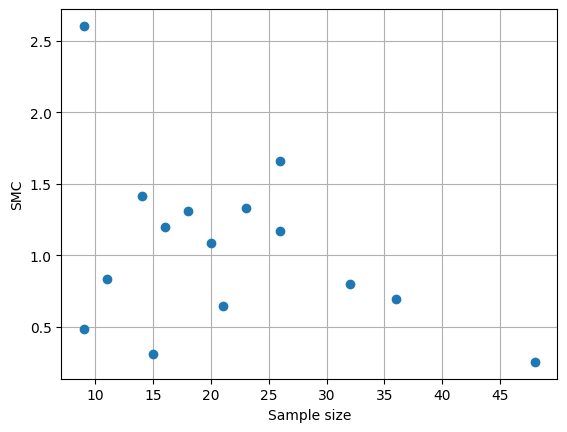

In [ ]:
plt.grid(True)
plt.plot(da["n1i"], da["smc"], "o")
plt.xlabel("Sample size")
plt.ylabel("SMC")

Since we are working with standardized effects, the standard error is a smooth function of the sample size.

Text(0, 0.5, 'Sample size')

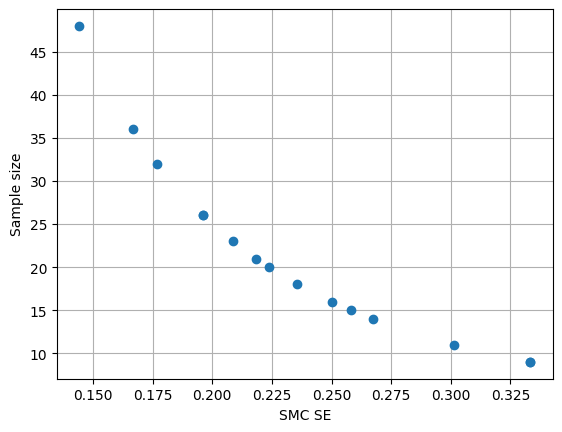

In [ ]:
plt.grid(True)
plt.plot(da["smc_se"], da["n1i"], "o")
plt.xlabel("SMC SE")
plt.ylabel("Sample size")

The following function calculates the pooled estimate of the SMC using inverse variance weighting.

In [ ]:
def pooled_smc(da):
  w = 1 / da["smc_se"]**2
  w /= w.sum()
  smc0 = np.dot(w, da["smc"])
  return smc0

The following function constructs a simple [forest plot](https://en.wikipedia.org/wiki/Forest_plot) of the study-level SMC's, along with the pooled estimate of the population SMC.  This should align with figure 3 from the Hindley et al. paper.

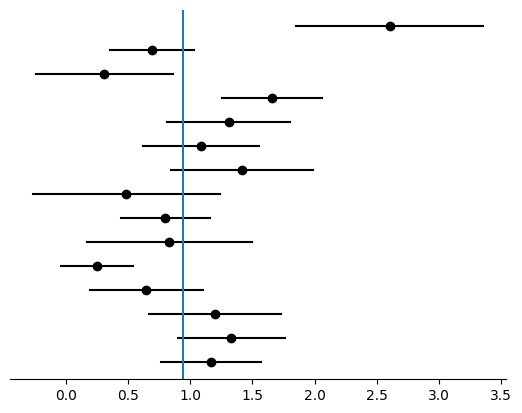

In [ ]:
def forest(da):
  ii = da.shape[0] - np.arange(da.shape[0])
  plt.plot(da["smc"], ii, "o", color="black")
  for i in range(len(ii)):
    plt.plot([da["lcb"][i], da["ucb"][i]], [ii[i], ii[i]], "-", color="black")
  smc0 = pooled_smc(da)
  plt.gca().axvline(smc0)
  plt.gca().spines[['right', 'left', 'top']].set_visible(False)
  plt.gca().set_yticks([])
  plt.show()

forest(da)

The function below calculate the pooled SMC estimate, the Cochrane's Q statistics, and the corresponding estimate of the heterogeneity statistic I-squared.

In [ ]:
def cochraneQ(da):
  smc0 = pooled_smc(da)
  cq = (da["smc"] - smc0) / da["smc_se"]
  Q = np.sum(cq**2)
  isquare = 1 - (da.shape[0]-1)/Q
  return smc0,Q,isquare


In [ ]:
smc0, Q, isquare = cochraneQ(da)
isquare

0.8364178909302169